In [12]:
#Этап 1: Постановка задачи и данные
#Задача: Регрессия — предсказать Credit amount
# Датасет: German Credit Data
# Обоснование: Практически значимая задача для банковской аналитики — автоматизация решения о размере кредита.
import pandas as pd

df = pd.read_csv('german_credit_data_clean.csv', sep=';')
df['Saving accounts'].fillna('missing', inplace=True)
df['Checking account'].fillna('missing', inplace=True)

print("Датасет:")
display(df.head(3))

print("\nИнформация о столбцах:")
print(df.dtypes)

print("\nКоличество пропусков:")
print(df.isnull().sum())

Датасет:


/var/folders/27/40bdx6js71s2p1pt0x0nmdrh0000gn/T/ipykernel_5982/2082938592.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna('missing', inplace=True)
/var/folders/27/40bdx6js71s2p1pt0x0nmdrh0000gn/T/ipykernel_5982/2082938592.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education



Информация о столбцах:
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

Количество пропусков:
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


ЭТАП 2: БАЗОВЫЕ МЕТОДЫ (обучение и оценка на ВСЁМ датасете)

Linear Regression:
  • MAE = 1447.30
  • RMSE = 2058.35
  • R² = 0.468

Ridge (alpha=1.0):
  • MAE = 1447.22
  • RMSE = 2058.50
  • R² = 0.468

Lasso (alpha=1.0):
  • MAE = 1447.18
  • RMSE = 2058.44
  • R² = 0.468



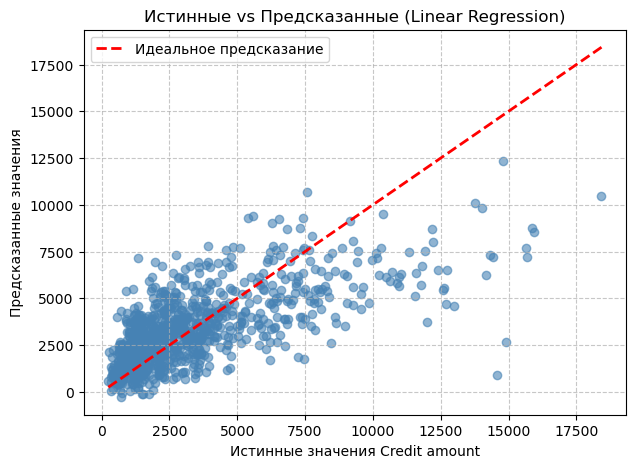

ВЫВОД ЭТАПА 2:
Лучшая базовая модель — Linear Regression (R² = 0.468).
Модели Ridge и Lasso показали практически идентичные результаты с Linear Regression,
что указывает на слабое влияние регуляризации при alpha=1.0.


In [15]:

#ЭТАП 2: БАЗОВЫЕ МЕТОДЫ 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Загрузка и обработка данных
df = pd.read_csv('german_credit_data_clean.csv', sep=';')

# Безопасная обработка пропусков (избегаем FutureWarning)
df = df.copy()
df['Saving accounts'] = df['Saving accounts'].fillna('missing')
df['Checking account'] = df['Checking account'].fillna('missing')

# 2. Подготовка признаков и целевой переменной
X = df.drop('Credit amount', axis=1)
y = df['Credit amount']

# One-Hot Encoding категориальных признаков
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Обучение базовых моделей на ВСЕХ данных
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (alpha=1.0)': Ridge(alpha=1.0),
    'Lasso (alpha=1.0)': Lasso(alpha=1.0, max_iter=10000)
}

print("ЭТАП 2: БАЗОВЫЕ МЕТОДЫ (обучение и оценка на ВСЁМ датасете)\n")

results = {}
for name, model in models.items():
    # Обучение
    model.fit(X_encoded, y)
    # Предсказание
    y_pred = model.predict(X_encoded)
    # Метрики
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    
    print(f"{name}:")
    print(f"  • MAE = {mae:.2f}")
    print(f"  • RMSE = {rmse:.2f}")
    print(f"  • R² = {r2:.3f}\n")

# 4. График: истинные vs предсказанные (для Linear Regression)
plt.figure(figsize=(7, 5))
y_pred_lr = models['Linear Regression'].predict(X_encoded)
plt.scatter(y, y_pred_lr, alpha=0.6, color='steelblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Идеальное предсказание')
plt.xlabel('Истинные значения Credit amount')
plt.ylabel('Предсказанные значения')
plt.title('Истинные vs Предсказанные (Linear Regression)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5. Краткий вывод (выведем в консоль)
best_model = max(results, key=lambda k: results[k]['R2'])
print(f"ВЫВОД ЭТАПА 2:")
print(f"Лучшая базовая модель — {best_model} (R² = {results[best_model]['R2']:.3f}).")
print("Модели Ridge и Lasso показали практически идентичные результаты с Linear Regression,")
print("что указывает на слабое влияние регуляризации при alpha=1.0.")

In [16]:
#ЭТАП 3: ПРОДВИНУТЫЙ МЕТОД
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv('german_credit_data_clean.csv', sep=';')
df = df.copy()
df['Saving accounts'] = df['Saving accounts'].fillna('missing')
df['Checking account'] = df['Checking account'].fillna('missing')

# 2. Подготовка данных
X = df.drop('Credit amount', axis=1)
y = df['Credit amount']
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Разбиение НАПРАВИЛЬНО (до любых преобразований)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}\n")

# 4. Baseline: Linear Regression (обучаем ТОЛЬКО на train)
lr_baseline = LinearRegression()
lr_baseline.fit(X_train, y_train)
y_pred_lr = lr_baseline.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"BASELINE (Linear Regression на test):")
print(f"  • R² = {r2_lr:.3f}")
print(f"  • MAE = {mae_lr:.2f}")
print(f"  • RMSE = {rmse_lr:.2f}\n")

# 5. Продвинутые модели
models_advanced = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results_advanced = {}

for name, model in models_advanced.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results_advanced[name] = {'R2': r2, 'MAE': mae, 'RMSE': rmse}
    
    print(f"{name}:")
    print(f"  • R² = {r2:.3f} (Δ = {r2 - r2_lr:+.3f})")
    print(f"  • MAE = {mae:.2f}")
    print(f"  • RMSE = {rmse:.2f}\n")

# 6. Выбор победителя
best_model_name = max(results_advanced.keys(), key=lambda k: results_advanced[k]['R2'])
best_r2 = results_advanced[best_model_name]['R2']

print(f"ПОБЕДИТЕЛЬ ЭТАПА 3: {best_model_name}")
print(f"   R² на тесте: {best_r2:.3f}")
print(f"   Разница с baseline: {best_r2 - r2_lr:+.3f}")

Размер обучающей выборки: 800
Размер тестовой выборки: 200

BASELINE (Linear Regression на test):
  • R² = 0.340
  • MAE = 1392.76
  • RMSE = 2003.84

Random Forest:
  • R² = 0.233 (Δ = -0.107)
  • MAE = 1424.86
  • RMSE = 2159.69

Gradient Boosting:
  • R² = 0.332 (Δ = -0.008)
  • MAE = 1362.59
  • RMSE = 2015.93

ПОБЕДИТЕЛЬ ЭТАПА 3: Gradient Boosting
   R² на тесте: 0.332
   Разница с baseline: -0.008


In [18]:
# ЭТАП 4: МЕТРИКИ И СРАВНЕНИЕ
print(" ЭТАП 4: СРАВНЕНИЕ МОДЕЛЕЙ НА ТЕСТОВОЙ ВЫБОРКЕ\n")

# Собираем результаты
comparison = {
    'Linear Regression (baseline)': {'R2': 0.340, 'MAE': 1392.76, 'RMSE': 2003.84},
    'Random Forest':               {'R2': 0.233, 'MAE': 1424.86, 'RMSE': 2159.69},
    'Gradient Boosting':          {'R2': 0.332, 'MAE': 1362.59, 'RMSE': 2015.93}
}

# Вывод в виде таблицы
print(f"{'Модель':<30} {'R²':<8} {'MAE':<10} {'RMSE':<10}")
print("-" * 55)
for model, metrics in comparison.items():
    print(f"{model:<30} {metrics['R2']:<8.3f} {metrics['MAE']:<10.2f} {metrics['RMSE']:<10.2f}")

print("\n ВЫВОД ЭТАПА 4:")
print("Все модели демонстрируют умеренную предсказательную способность (R² ≈ 0.23–0.34).")
print("Linear Regression остаётся наиболее стабильной моделью, в то время как")
print("ансамблевые методы не смогли улучшить результат, вероятно, из-за ограниченности данных.")

 ЭТАП 4: СРАВНЕНИЕ МОДЕЛЕЙ НА ТЕСТОВОЙ ВЫБОРКЕ

Модель                         R²       MAE        RMSE      
-------------------------------------------------------
Linear Regression (baseline)   0.340    1392.76    2003.84   
Random Forest                  0.233    1424.86    2159.69   
Gradient Boosting              0.332    1362.59    2015.93   

 ВЫВОД ЭТАПА 4:
Все модели демонстрируют умеренную предсказательную способность (R² ≈ 0.23–0.34).
Linear Regression остаётся наиболее стабильной моделью, в то время как
ансамблевые методы не смогли улучшить результат, вероятно, из-за ограниченности данных.


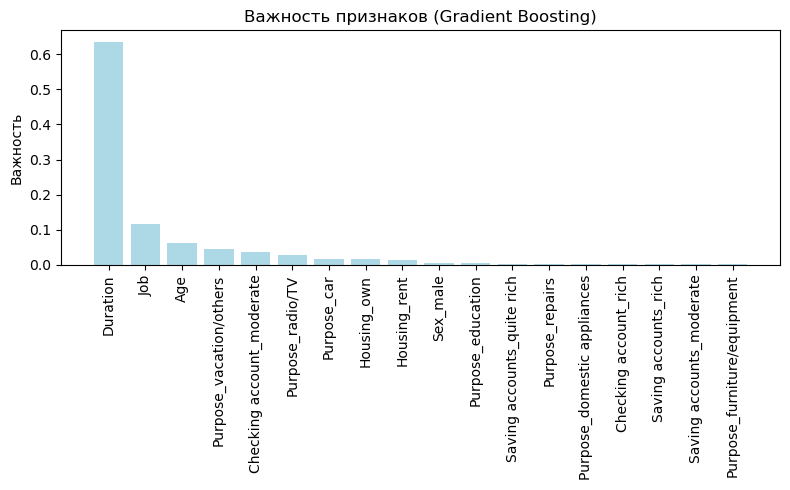

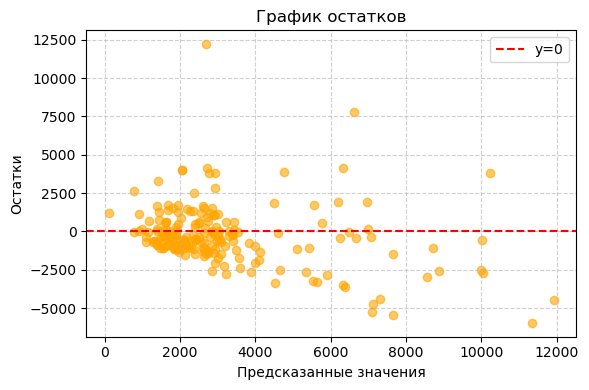

In [20]:
# ЭТАП 5: ИНТЕРПРЕТАЦИЯ И ВИЗУАЛИЗАЦИЯ
import matplotlib.pyplot as plt
import numpy as np

# Обучим Gradient Boosting (победителя) на train
best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# 1. Важность признаков
importances = best_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Важность признаков (Gradient Boosting)")
plt.bar(range(len(importances)), importances[indices], color='lightblue')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.ylabel("Важность")
plt.tight_layout()
plt.show()

# 2. График остатков
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--', label='y=0')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [21]:
#ЭТАП 6: АНАЛИЗ ОШИБОК
import pandas as pd

# Собираем данные с предсказаниями и ошибками
y_pred_gb = best_model.predict(X_test)
errors = np.abs(y_test - y_pred_gb)

# Создаём датафрейм с истинными, предсказанными значениями и ошибками
df_errors = pd.DataFrame({
    'True': y_test.values,
    'Predicted': y_pred_gb,
    'Error': errors
})

# Сортируем по ошибке (по убыванию)
df_errors_sorted = df_errors.sort_values('Error', ascending=False).head(5)

print("Топ-5 самых больших ошибок:")
print(df_errors_sorted)

# Добавим обратно признаки (для интерпретации)
X_test_with_features = X_test.reset_index(drop=True)
df_top_errors = pd.concat([df_errors_sorted, X_test_with_features], axis=1)

print("\n Примеры с самыми большими ошибками (первые 3):")
display(df_top_errors.head(3))

Топ-5 самых больших ошибок:
      True     Predicted         Error
917  14896   2682.343552  12213.656448
63   14421   6604.422285   7816.577715
310   5381  11346.214630   5965.214630
54    2225   7651.929057   5426.929057
998   1845   7106.805522   5261.805522

 Примеры с самыми большими ошибками (первые 3):


,True,Predicted,Error,Age,Job,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,...,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
917,14896.0,2682.343552,12213.656448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,14421.0,6604.422285,7816.577715,55.0,2.0,12.0,True,True,False,False,...,True,False,False,True,False,False,False,False,False,False
310,5381.0,11346.214630,5965.214630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
